In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample 3D coordinates for words in a legal corpus
word_embeddings = {
    'judge': (-100, -50, 50), 'evidence': (-80, -30, 30), 'trial': (0, 50, 100),
    'plaintiff': (50, 80, 100), 'defendant': (100, 100, 50), 'verdict': (0, -80, -50),
    'witness': (20, -70, -60), 'guilty': (70, -40, -70), 'court': (90, -30, -60),
    'agreement': (40, 70, 110), 'crime': (80, 90, 120), 'appeal': (70, 60, 0)
}




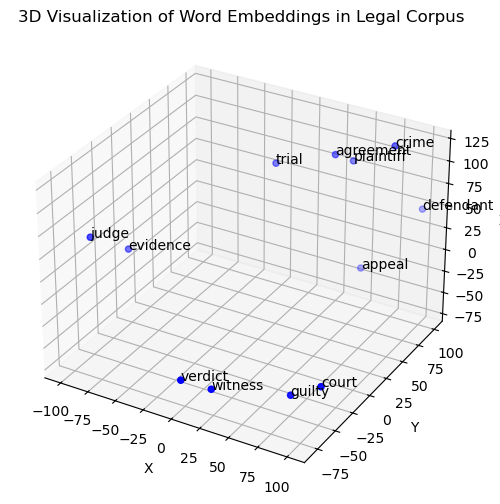

In [2]:
# Extract coordinates and words
x = [coord[0] for coord in word_embeddings.values()]
y = [coord[1] for coord in word_embeddings.values()]
z = [coord[2] for coord in word_embeddings.values()]
words = list(word_embeddings.keys())

# Plotting in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color='blue')

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    ax.text(x[i], y[i], z[i], word, fontsize=10)

# Labels and title
ax.set_title('3D Visualization of Word Embeddings in Legal Corpus')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [4]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Create a small legal-related corpus
legal_corpus = [
    "The defendant is guilty of the crime",
    "The plaintiff filed a lawsuit against the defendant",
    "The court ruled in favor of the defendant",
    "The legal proceedings were delayed by the judge",
    "The lawyer presented evidence in court",
    "A judge will issue a verdict after the trial",
    "The defendant has the right to remain silent",
    "A contract is a legally binding agreement",
    "The witness was cross-examined by the attorney",
    "The legal team will appeal the decision"
]

# Step 2: Tokenize the corpus (splitting into words)
corpus_tokenized = [sentence.split() for sentence in legal_corpus]

# Step 3: Train the Word2Vec model on the legal corpus
model = Word2Vec(corpus_tokenized, min_count=1, vector_size=100, window=5)

# Step 4: Extract word embeddings
words = list(model.wv.index_to_key)  # List of words in the vocabulary
word_embeddings = np.array([model.wv[word] for word in words])

# Step 5: Reduce dimensions to 3 for visualization (using PCA or t-SNE)
# Use PCA to reduce from 100 dimensions to 47 (the number of words in the corpus)
pca = PCA(n_components=47)
word_embeddings_pca = pca.fit_transform(word_embeddings)

# Then, reduce from 47 dimensions to 3 using t-SNE for better visualization
tsne = TSNE(n_components=3, random_state=42)
word_embeddings_tsne = tsne.fit_transform(word_embeddings_pca)



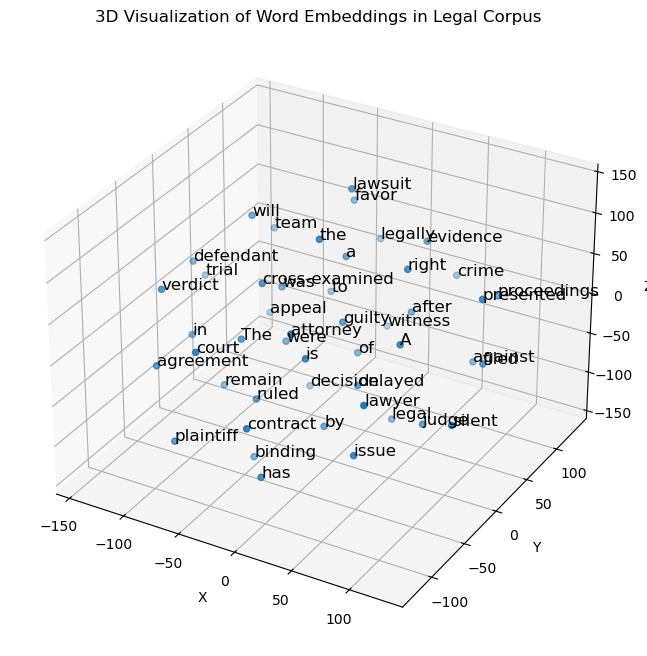

In [12]:
# Step 6: Plot the 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each word in 3D space
ax.scatter(word_embeddings_tsne[:, 0], word_embeddings_tsne[:, 1], word_embeddings_tsne[:, 2])

# Annotate the points with the corresponding words
for i, word in enumerate(words):
    ax.text(word_embeddings_tsne[i, 0], word_embeddings_tsne[i, 1], word_embeddings_tsne[i, 2], word, fontsize=12)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Title of the plot
ax.set_title('3D Visualization of Word Embeddings in Legal Corpus')

# Show the plot
plt.show()